In [47]:
import astropy.units as u
from astropy.constants import au, R_sun
from astropy.stats import gaussian_fwhm_to_sigma
import math
import numpy as np
from astropy.constants import au, R_sun

In [48]:
transunit = ((au/R_sun).value)**2 / 1000

# 这个文件主要说明我得出了与 P46图3.6 相反的结果
<img src="./visualization.assets/image-20230311153746936.png" alt="image-20230311153746936" style="zoom:30%;" />
alpha beta 方向都展示

## 我的结果 使用图片2048
$\lambda$ range: -0.1,0.25,25 

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
import math
from calculating_DN_2048 import wavelength_point_num, wavelength_list
from calculating_DN_2048 import angle_point_num_alpha,offaxis_angle_x_alpha, offaxis_angle_y_alpha
from calculating_DN_2048 import angle_point_num_beta,offaxis_angle_x_beta, offaxis_angle_y_beta

DN = np.load("output_DN/_2048/DN_2048.npz")

# Initialize
# Cruciformscan in alpha direction
offaxis_angle_x_min_alpha=offaxis_angle_x_alpha*180*60/math.pi

# Cruciformscan in beta direction
offaxis_angle_y_min_beta=offaxis_angle_y_beta*180*60/math.pi

# Fit data in DN??.npz
wavelength_shift_alpha = np.zeros(angle_point_num_alpha)
fit_alpha = []   # List of Gaussian1D
for i in range(angle_point_num_alpha):
    g_init = models.Gaussian1D(amplitude=1E9, mean=0.05, stddev=0.0424)
    # initial value for fitting
    fit_g = fitting.LevMarLSQFitter()
    g = fit_g(g_init, wavelength_list, DN['DN_alpha'][i])
    wavelength_shift_alpha[i] = g.mean.value
    fit_alpha.append(g)

Text(0, 0.5, 'Digital Number per nm (?)')

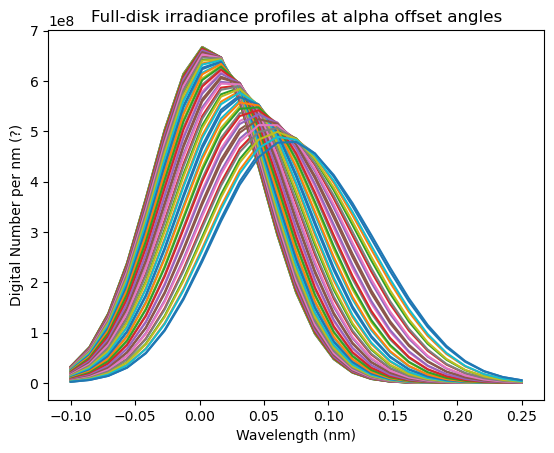

In [16]:
# Profiles during cruciformscan
fig, ax = plt.subplots()
# Profiles during cruciformscan in alpha direction
for i in range(angle_point_num_alpha):# angle_point_num_alpha
    ax.plot(wavelength_list, DN['DN_alpha'][i], label='linear')
# ax.set_title("He II 谱线轮廓随入射偏角𝜶变化的模拟结果")
ax.set_title("Full-disk irradiance profiles at alpha offset angles")
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("Digital Number per nm (?)")

Text(0.5, 1.0, 'Full-disk irradiance profiles at alpha offset angles')

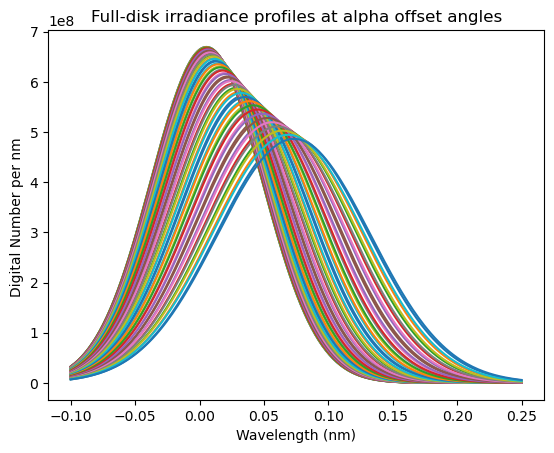

In [3]:
# Fitted profiles during cruciformscan
fig, ax = plt.subplots()
wavelength_densed_list = np.linspace(-0.1, 0.25, 10*wavelength_point_num)
# Profiles during cruciformscan in alpha direction
for i in range(angle_point_num_alpha):
    ax.plot(wavelength_densed_list, fit_alpha[i](
        wavelength_densed_list), label='linear')

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("Digital Number per nm ")
ax.set_title("Full-disk irradiance profiles at alpha offset angles")



Text(0.5, 1.0, 'Unpanned simulation')

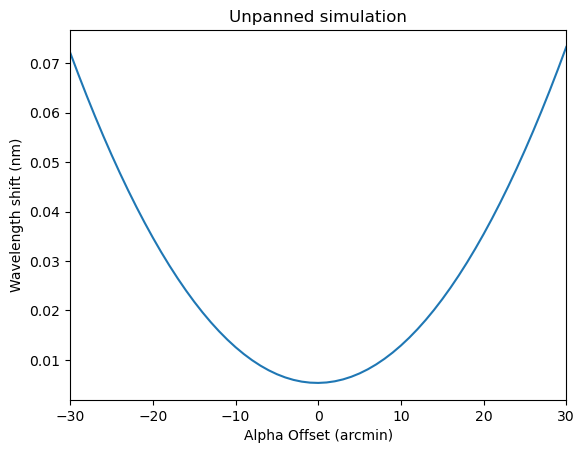

In [4]:
# Central wavelength shift
fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha)
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlim(-30,30)
ax.set_title("Unpanned simulation")

(-30.0, 30.0)

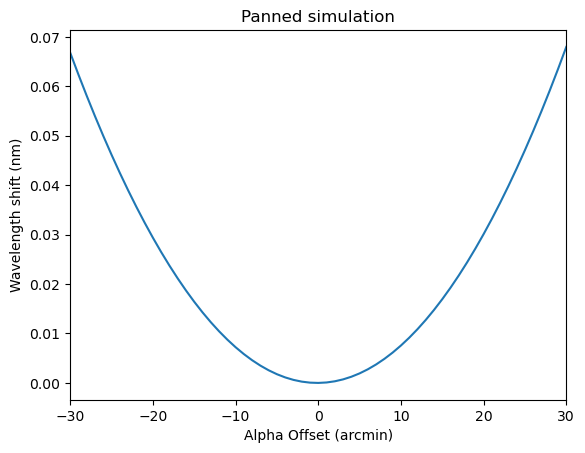

In [5]:
# Panned central wavelength shift
# Y 轴的零点被设定为全日面 He II 谱线在没有任何 SDO 卫星偏转时的中心波长位置，
# 也就是𝛼 = 0且𝛽 = 0的情况
# 我采用直接向下平移

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha -
        wavelength_shift_alpha[int(angle_point_num_alpha/2)]) # 我采用直接向下平移
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

In [6]:
wavelength_shift_alpha -wavelength_shift_alpha[int(angle_point_num_alpha/2)]

array([6.67432486e-02, 6.23065524e-02, 5.80256671e-02, 5.39003223e-02,
       4.99301923e-02, 4.61149579e-02, 4.24542829e-02, 3.89478136e-02,
       3.55951802e-02, 3.23959990e-02, 2.93498748e-02, 2.64564041e-02,
       2.37151785e-02, 2.11257883e-02, 1.86878256e-02, 1.64008889e-02,
       1.42645846e-02, 1.22785337e-02, 1.04423723e-02, 8.75575585e-03,
       7.21836119e-03, 5.82988949e-03, 4.59006810e-03, 3.49865240e-03,
       2.55542726e-03, 1.76020829e-03, 1.11284270e-03, 6.13210082e-04,
       2.61222835e-04, 5.68265207e-05, 0.00000000e+00, 9.07554563e-05,
       3.29138283e-04, 7.15226852e-04, 1.24913215e-03, 1.93099729e-03,
       2.76099685e-03, 3.73933608e-03, 4.86624983e-03, 6.14200134e-03,
       7.56688072e-03, 9.14120313e-03, 1.08653068e-02, 1.27395504e-02,
       1.47643108e-02, 1.69399797e-02, 1.92669598e-02, 2.17456643e-02,
       2.43765092e-02, 2.71599123e-02, 3.00962889e-02, 3.31860481e-02,
       3.64295892e-02, 3.98272992e-02, 4.33795496e-02, 4.70866942e-02,
      

(-30.0, 30.0)

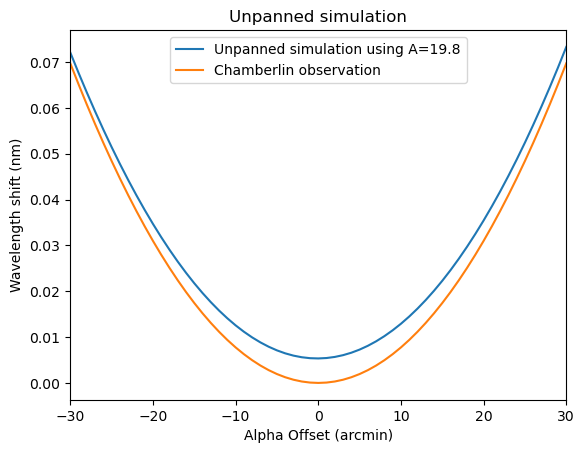

In [9]:
# central wavelength shift 
# my panned simulation vs. Chamberlin(2016) observation

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha )
ax.plot(offaxis_angle_x_min_alpha,915.53*offaxis_angle_x_alpha**2)  #这个换算详见unit_conversion.py
ax.legend(["Unpanned simulation using A=19.8","Chamberlin observation"])
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Unpanned simulation")
ax.set_xlim(-30,30)

(-30.0, 30.0)

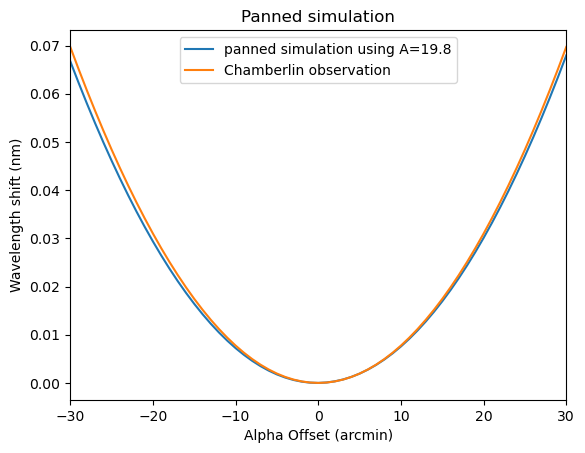

In [10]:
# central wavelength shift 
# my panned simulation vs. Chamberlin(2016) observation

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha -
        wavelength_shift_alpha[int(angle_point_num_alpha/2)])
ax.plot(offaxis_angle_x_min_alpha,915.53*offaxis_angle_x_alpha**2)  #这个换算详见unit_conversion.py
ax.legend(["panned simulation using A=19.8","Chamberlin observation"])
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

## 我的结果 使用图片4096

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
import math
from calculating_DN_4096 import wavelength_point_num, wavelength_list
from calculating_DN_4096 import angle_point_num_alpha,offaxis_angle_x_alpha, offaxis_angle_y_alpha
from calculating_DN_4096 import angle_point_num_beta,offaxis_angle_x_beta, offaxis_angle_y_beta

DN = np.load("output_DN/_4096/DN_4096.npz")

# Initialize
# Cruciformscan in alpha direction
offaxis_angle_x_min_alpha=offaxis_angle_x_alpha*180*60/math.pi

# Cruciformscan in beta direction
offaxis_angle_y_min_beta=offaxis_angle_y_beta*180*60/math.pi

# Fit data in DN??.npz
wavelength_shift_alpha = np.zeros(angle_point_num_alpha)
fit_alpha = []   # List of Gaussian1D
for i in range(angle_point_num_alpha):
    g_init = models.Gaussian1D(amplitude=1E9, mean=0.05, stddev=0.0424)
    # initial value for fitting
    fit_g = fitting.LevMarLSQFitter()
    g = fit_g(g_init, wavelength_list, DN['DN_alpha'][i])
    wavelength_shift_alpha[i] = g.mean.value
    fit_alpha.append(g)

Text(0, 0.5, 'Digital Number per nm (?)')

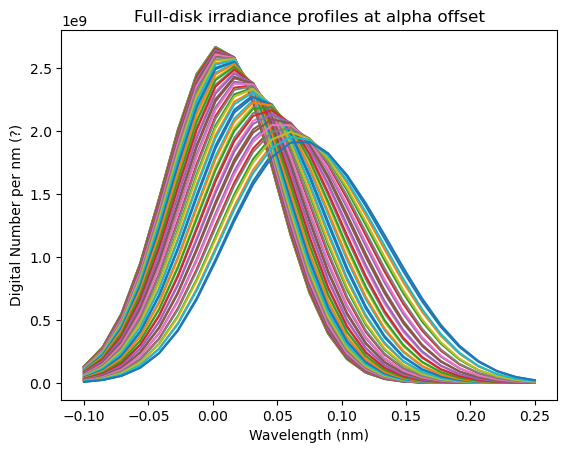

In [12]:
# Profiles during cruciformscan
fig, ax = plt.subplots()
# Profiles during cruciformscan in alpha direction
for i in range(angle_point_num_alpha):
    ax.plot(wavelength_list, DN['DN_alpha'][i], label='linear')
# ax.set_title("He II 谱线轮廓随入射偏角𝜶变化的模拟结果")
ax.set_title("Full-disk irradiance profiles at alpha offset")
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("Digital Number per nm (?)")

Text(0.5, 1.0, 'Fitted full-disk irradiance profiles at alpha offset')

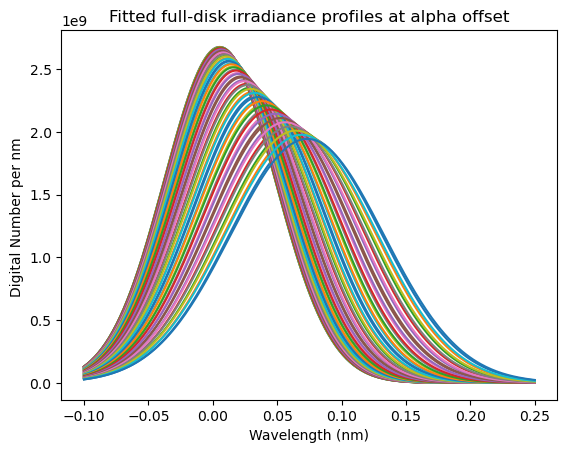

In [13]:
# Fitted profiles during cruciformscan
fig, ax = plt.subplots()
wavelength_densed_list = np.linspace(-0.1, 0.25, 10*wavelength_point_num)
# Profiles during cruciformscan in alpha direction
for i in range(angle_point_num_alpha):
    ax.plot(wavelength_densed_list, fit_alpha[i](
        wavelength_densed_list), label='linear')

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("Digital Number per nm ")
ax.set_title("Fitted full-disk irradiance profiles at alpha offset")



(-30.0, 30.0)

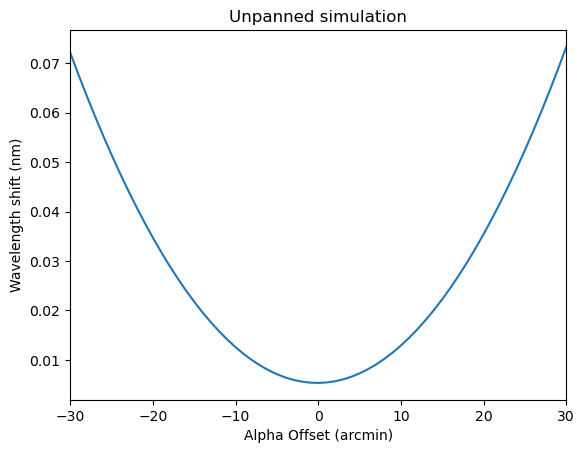

In [14]:
# Central wavelength shift
fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha)
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_ylabel('Wavelength shift (nm)')
ax.set_title("Unpanned simulation")
ax.set_xlim(-30,30)

(-30.0, 30.0)

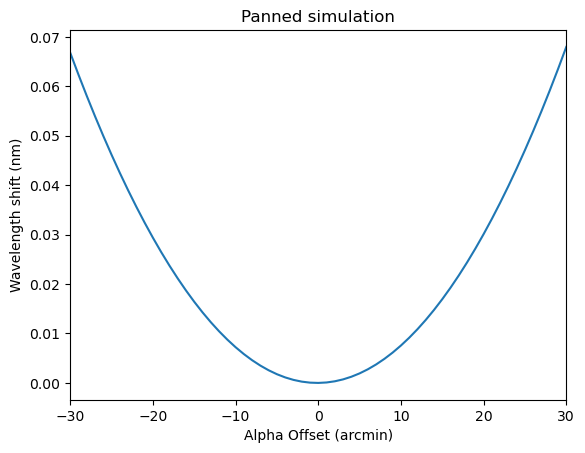

In [15]:
# Panned central wavelength shift
# Y 轴的零点被设定为全日面 He II 谱线在没有任何 SDO 卫星偏转时的中心波长位置，
# 也就是𝛼 = 0且𝛽 = 0的情况
# 我采用直接向下平移

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha -
        wavelength_shift_alpha[int(angle_point_num_alpha/2)]) # 我采用直接向下平移
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

### 2048和4096 区别很小

这是上方2048的图片

<img src="./visualization.assets/image-20230312154027491.png" alt="image-20230312154027491" style="zoom:50%;" />

In [16]:
# 这是4096
wavelength_shift_alpha -wavelength_shift_alpha[int(angle_point_num_alpha/2)]

array([6.67453143e-02, 6.23085338e-02, 5.80275797e-02, 5.39021513e-02,
       4.99319405e-02, 4.61166268e-02, 4.24558736e-02, 3.89493274e-02,
       3.55966186e-02, 3.23973578e-02, 2.93511601e-02, 2.64576170e-02,
       2.37163201e-02, 2.11268596e-02, 1.86888275e-02, 1.64018226e-02,
       1.42654515e-02, 1.22793346e-02, 1.04431085e-02, 8.75642754e-03,
       7.21896945e-03, 5.83043508e-03, 4.59055165e-03, 3.49907447e-03,
       2.55578832e-03, 1.76050870e-03, 1.11308278e-03, 6.13390035e-04,
       2.61342788e-04, 5.68865159e-05, 0.00000000e+00, 9.06953469e-05,
       3.29017877e-04, 7.15045894e-04, 1.24889032e-03, 1.93069421e-03,
       2.76063208e-03, 3.73890914e-03, 4.86576018e-03, 6.14144840e-03,
       7.56626387e-03, 9.14052179e-03, 1.08645602e-02, 1.27387379e-02,
       1.47634315e-02, 1.69390325e-02, 1.92659452e-02, 2.17445809e-02,
       2.43753561e-02, 2.71586887e-02, 3.00949938e-02, 3.31846805e-02,
       3.64281524e-02, 3.98257883e-02, 4.33779639e-02, 4.70850333e-02,
      

(-30.0, 30.0)

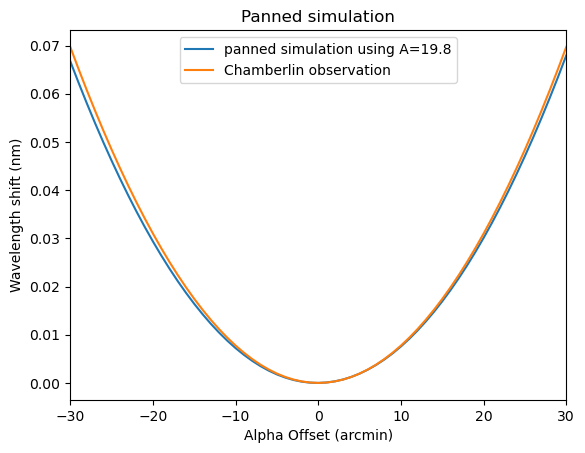

In [17]:
# central wavelength shift 
# my panned simulation vs. Chamberlin(2016) observation

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha -
        wavelength_shift_alpha[int(angle_point_num_alpha/2)])
ax.plot(offaxis_angle_x_min_alpha,915.53*offaxis_angle_x_alpha**2)  #这个换算详见unit_conversion.py
ax.legend(["panned simulation using A=19.8","Chamberlin observation"])
ax.set_ylabel('Wavelength shift (nm)')
ax.set_title("Panned simulation")
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_xlim(-30,30)

## 2048 minus 含有负值

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
import math
from calculating_DN_2048 import wavelength_point_num, wavelength_list
from calculating_DN_2048 import angle_point_num_alpha,offaxis_angle_x_alpha, offaxis_angle_y_alpha
from calculating_DN_2048 import angle_point_num_beta,offaxis_angle_x_beta, offaxis_angle_y_beta

DN = np.load("output_DN/_2048/DN_2048_minus.npz")

# Initialize
# Cruciformscan in alpha direction
offaxis_angle_x_min_alpha=offaxis_angle_x_alpha*180*60/math.pi

# Cruciformscan in beta direction
offaxis_angle_y_min_beta=offaxis_angle_y_beta*180*60/math.pi

# Fit data in DN??.npz
wavelength_shift_alpha = np.zeros(angle_point_num_alpha)
fit_alpha = []   # List of Gaussian1D
for i in range(angle_point_num_alpha):
    g_init = models.Gaussian1D(amplitude=1E9, mean=0.05, stddev=0.0424)
    # initial value for fitting
    fit_g = fitting.LevMarLSQFitter()
    g = fit_g(g_init, wavelength_list, DN['DN_alpha'][i])
    wavelength_shift_alpha[i] = g.mean.value
    fit_alpha.append(g)

Text(0, 0.5, 'Digital Number per nm (?)')

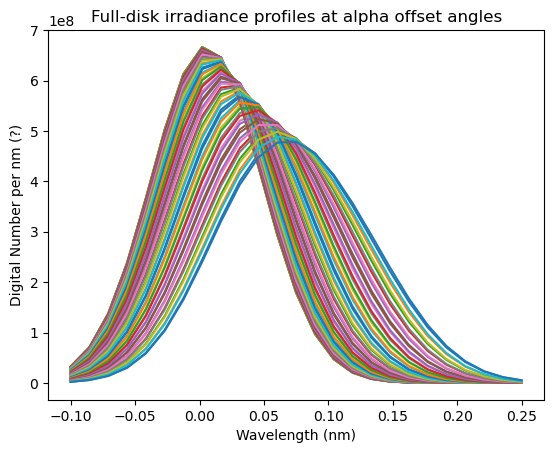

In [2]:
# Profiles during cruciformscan
fig, ax = plt.subplots()
# Profiles during cruciformscan in alpha direction
for i in range(angle_point_num_alpha):
    ax.plot(wavelength_list, DN['DN_alpha'][i], label='linear')
# ax.set_title("He II 谱线轮廓随入射偏角𝜶变化的模拟结果")
ax.set_title("Full-disk irradiance profiles at alpha offset angles")
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("Digital Number per nm (?)")

Text(0.5, 1.0, 'Unpanned simulation')

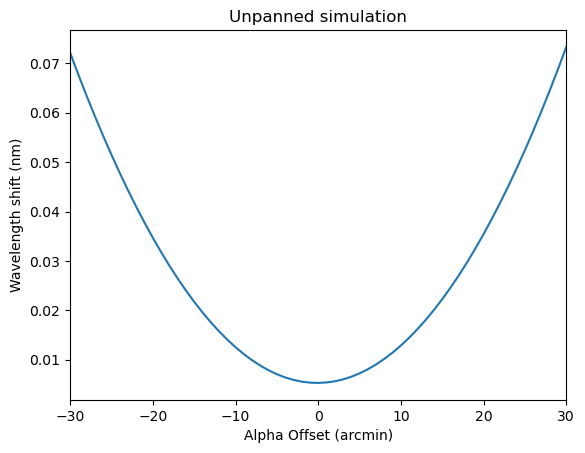

In [3]:
# Central wavelength shift
fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha)
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlim(-30,30)
ax.set_title("Unpanned simulation")

(-30.0, 30.0)

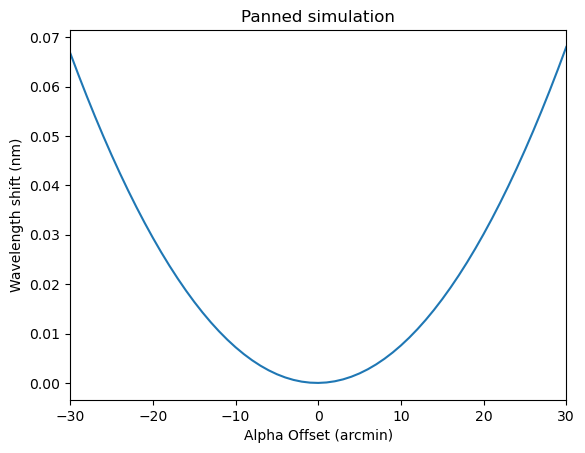

In [4]:
# Panned central wavelength shift
# Y 轴的零点被设定为全日面 He II 谱线在没有任何 SDO 卫星偏转时的中心波长位置，
# 也就是𝛼 = 0且𝛽 = 0的情况
# 我采用直接向下平移

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha -
        wavelength_shift_alpha[int(angle_point_num_alpha/2)]) # 我采用直接向下平移
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

## IDL

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
import math
from calculating_DN_2048 import wavelength_point_num, wavelength_list
from calculating_DN_2048 import angle_point_num_alpha,offaxis_angle_x_alpha, offaxis_angle_y_alpha
from calculating_DN_2048 import angle_point_num_beta,offaxis_angle_x_beta, offaxis_angle_y_beta

DN = np.load("output_DN/_2048/DN_2048_IDL.npz")

# Initialize
# Cruciformscan in alpha direction
offaxis_angle_x_min_alpha=offaxis_angle_x_alpha*180*60/math.pi

# Cruciformscan in beta direction
offaxis_angle_y_min_beta=offaxis_angle_y_beta*180*60/math.pi

# Fit data in DN??.npz
wavelength_shift_alpha = np.zeros(angle_point_num_alpha)
fit_alpha = []   # List of Gaussian1D
for i in range(angle_point_num_alpha):
    g_init = models.Gaussian1D(amplitude=1E9, mean=0.05, stddev=0.0424)
    # initial value for fitting
    fit_g = fitting.LevMarLSQFitter()
    g = fit_g(g_init, wavelength_list, DN['DN_alpha'][i])
    wavelength_shift_alpha[i] = g.mean.value
    fit_alpha.append(g)

Text(0, 0.5, 'Digital Number per nm (?)')

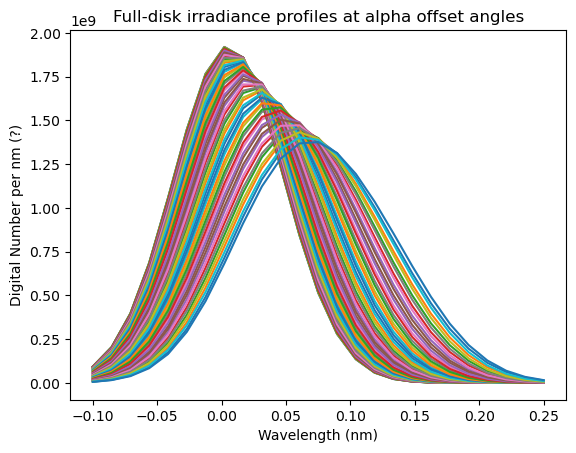

In [2]:
# Profiles during cruciformscan
fig, ax = plt.subplots()
# Profiles during cruciformscan in alpha direction
for i in range(angle_point_num_alpha):
    ax.plot(wavelength_list, DN['DN_alpha'][i], label='linear')
# ax.set_title("He II 谱线轮廓随入射偏角𝜶变化的模拟结果")
ax.set_title("Full-disk irradiance profiles at alpha offset angles")
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("Digital Number per nm (?)")

Text(0.5, 1.0, 'Unpanned simulation')

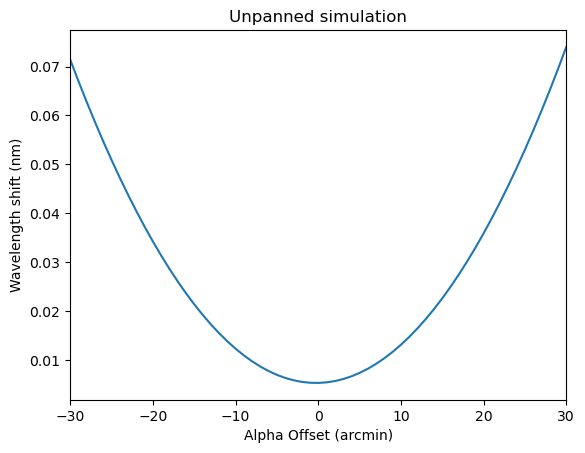

In [22]:
# Central wavelength shift
fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha)
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlim(-30,30)
ax.set_title("Unpanned simulation")

(-30.0, 30.0)

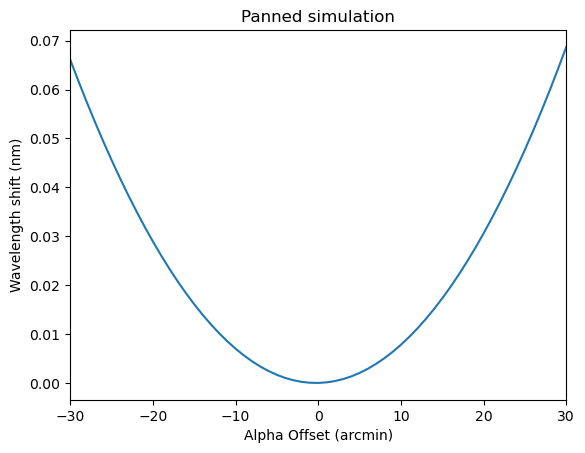

In [27]:
# Panned central wavelength shift
# Y 轴的零点被设定为全日面 He II 谱线在没有任何 SDO 卫星偏转时的中心波长位置，
# 也就是𝛼 = 0且𝛽 = 0的情况
# 我采用直接向下平移

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha -
        wavelength_shift_alpha[int(angle_point_num_alpha/2)]) # 我采用直接向下平移
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

(-30.0, 30.0)

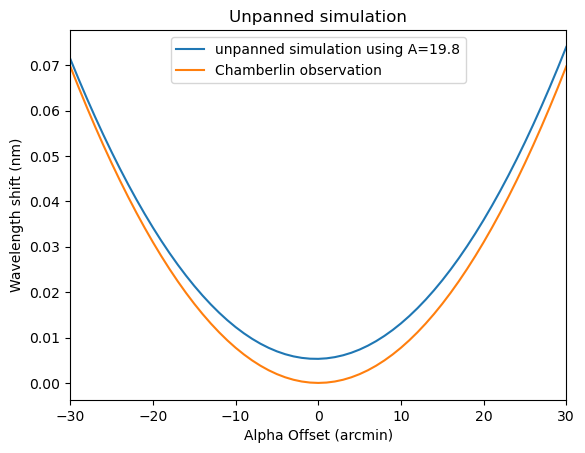

In [29]:
# central wavelength shift 
# my panned simulation vs. Chamberlin(2016) observation

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha )
ax.plot(offaxis_angle_x_min_alpha,915.53*offaxis_angle_x_alpha**2)  #这个换算详见unit_conversion.py
ax.legend(["unpanned simulation using A=19.8","Chamberlin observation"])
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Unpanned simulation")
ax.set_xlim(-30,30)

(-30.0, 30.0)

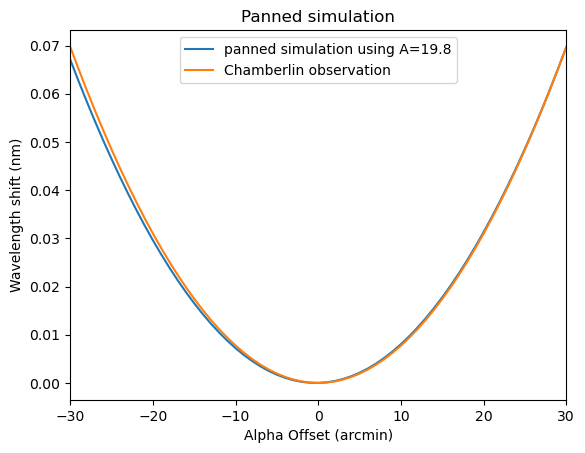

In [45]:
# central wavelength shift 
# my panned simulation vs. Chamberlin(2016) observation

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha -
        wavelength_shift_alpha[int(angle_point_num_alpha/2)])
ax.plot(offaxis_angle_x_min_alpha,915.53*offaxis_angle_x_alpha**2)  #这个换算详见unit_conversion.py
ax.legend(["panned simulation using A=19.8","Chamberlin observation"])
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

## IDL large lambda range

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
import math
from calculating_DN_2048 import wavelength_point_num, wavelength_list
from calculating_DN_2048 import angle_point_num_alpha,offaxis_angle_x_alpha, offaxis_angle_y_alpha
from calculating_DN_2048 import angle_point_num_beta,offaxis_angle_x_beta, offaxis_angle_y_beta

DN = np.load("output_DN/_2048/DN_2048_IDL_large_lambda_range.npz")

# Initialize
# Cruciformscan in alpha direction
offaxis_angle_x_min_alpha=offaxis_angle_x_alpha*180*60/math.pi

# Cruciformscan in beta direction
offaxis_angle_y_min_beta=offaxis_angle_y_beta*180*60/math.pi

# Fit data in DN??.npz
wavelength_shift_alpha = np.zeros(angle_point_num_alpha)
fit_alpha = []   # List of Gaussian1D
for i in range(angle_point_num_alpha):
    g_init = models.Gaussian1D(amplitude=1E9, mean=0.05, stddev=0.0424)
    # initial value for fitting
    fit_g = fitting.LevMarLSQFitter()
    g = fit_g(g_init, wavelength_list, DN['DN_alpha'][i])
    wavelength_shift_alpha[i] = g.mean.value
    fit_alpha.append(g)

Text(0, 0.5, 'Digital Number per nm (?)')

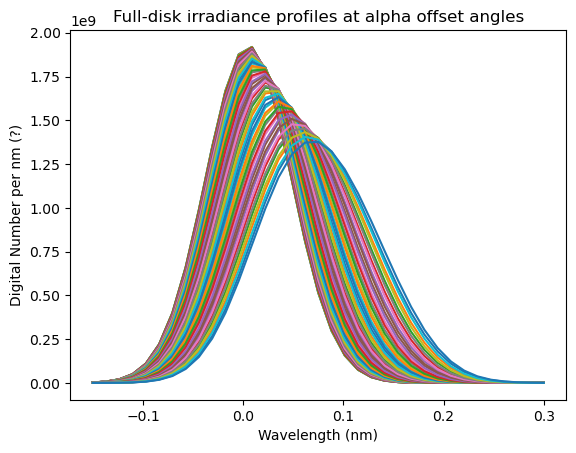

In [4]:
# Profiles during cruciformscan
fig, ax = plt.subplots()
# Profiles during cruciformscan in alpha direction
for i in range(angle_point_num_alpha):
    ax.plot(wavelength_list, DN['DN_alpha'][i], label='linear')
# ax.set_title("He II 谱线轮廓随入射偏角𝜶变化的模拟结果")
ax.set_title("Full-disk irradiance profiles at alpha offset angles")
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("Digital Number per nm (?)")

Text(0.5, 1.0, 'Unpanned simulation')

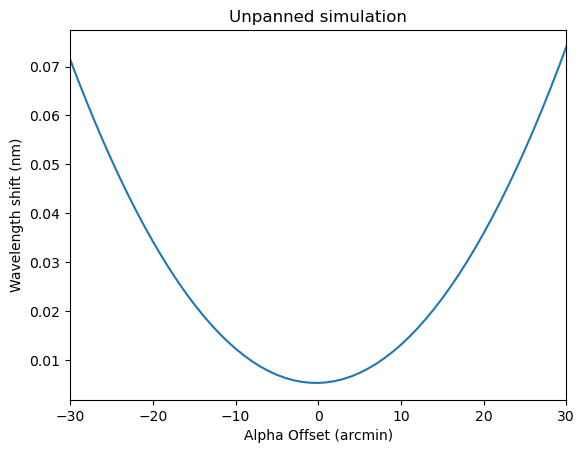

In [6]:
# Central wavelength shift
fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha)
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlim(-30,30)
ax.set_title("Unpanned simulation")

(-30.0, 30.0)

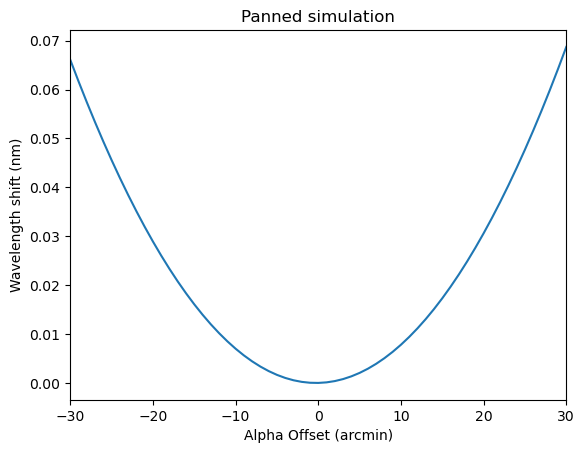

In [7]:
# Panned central wavelength shift
# Y 轴的零点被设定为全日面 He II 谱线在没有任何 SDO 卫星偏转时的中心波长位置，
# 也就是𝛼 = 0且𝛽 = 0的情况
# 我采用直接向下平移

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha -
        wavelength_shift_alpha[int(angle_point_num_alpha/2)]) # 我采用直接向下平移
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

## wrong IDL P38 3.2

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
import math
from calculating_DN_2048 import wavelength_point_num, wavelength_list
from calculating_DN_2048 import angle_point_num_alpha,offaxis_angle_x_alpha, offaxis_angle_y_alpha
from calculating_DN_2048 import angle_point_num_beta,offaxis_angle_x_beta, offaxis_angle_y_beta

DN = np.load("output_DN/_2048/DN_2048_IDL_wrongP38.npz")

# Initialize
# Cruciformscan in alpha direction
offaxis_angle_x_min_alpha=offaxis_angle_x_alpha*180*60/math.pi

# Cruciformscan in beta direction
offaxis_angle_y_min_beta=offaxis_angle_y_beta*180*60/math.pi

# Fit data in DN??.npz
wavelength_shift_alpha = np.zeros(angle_point_num_alpha)
fit_alpha = []   # List of Gaussian1D
for i in range(angle_point_num_alpha):
    g_init = models.Gaussian1D(amplitude=1E9, mean=0.05, stddev=0.0424)
    # initial value for fitting
    fit_g = fitting.LevMarLSQFitter()
    g = fit_g(g_init, wavelength_list, DN['DN_alpha'][i])
    wavelength_shift_alpha[i] = g.mean.value
    fit_alpha.append(g)

Text(0, 0.5, 'Digital Number per nm (?)')

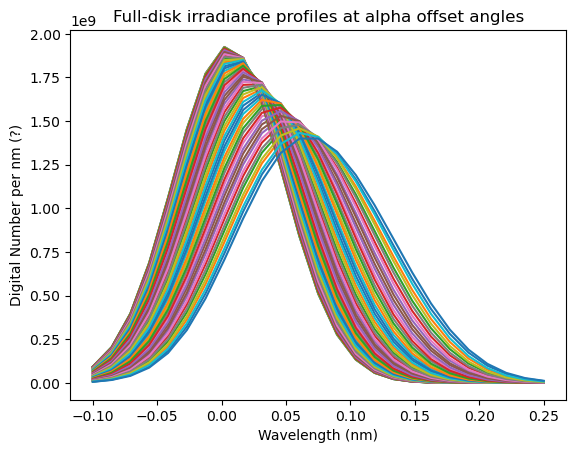

In [32]:
# Profiles during cruciformscan
fig, ax = plt.subplots()
# Profiles during cruciformscan in alpha direction
for i in range(angle_point_num_alpha):
    ax.plot(wavelength_list, DN['DN_alpha'][i], label='linear')
# ax.set_title("He II 谱线轮廓随入射偏角𝜶变化的模拟结果")
ax.set_title("Full-disk irradiance profiles at alpha offset angles")
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("Digital Number per nm (?)")

Text(0.5, 1.0, 'Unpanned simulation')

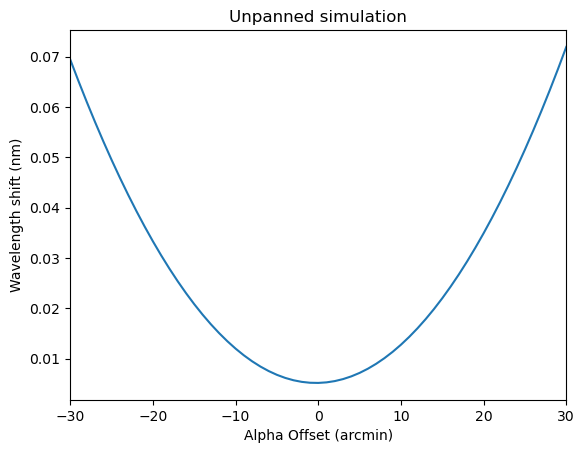

In [33]:
# Central wavelength shift
fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha)
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlim(-30,30)
ax.set_title("Unpanned simulation")

## wrong2 IDL P38 3.2

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
import math
from calculating_DN_2048 import wavelength_point_num, wavelength_list
from calculating_DN_2048 import angle_point_num_alpha,offaxis_angle_x_alpha, offaxis_angle_y_alpha
from calculating_DN_2048 import angle_point_num_beta,offaxis_angle_x_beta, offaxis_angle_y_beta

DN = np.load("output_DN/_2048/DN_2048_IDL_wrong2P38.npz")

# Initialize
# Cruciformscan in alpha direction
offaxis_angle_x_min_alpha=offaxis_angle_x_alpha*180*60/math.pi

# Cruciformscan in beta direction
offaxis_angle_y_min_beta=offaxis_angle_y_beta*180*60/math.pi

# Fit data in DN??.npz
wavelength_shift_alpha = np.zeros(angle_point_num_alpha)
fit_alpha = []   # List of Gaussian1D
for i in range(angle_point_num_alpha):
    g_init = models.Gaussian1D(amplitude=1E9, mean=0.05, stddev=0.0424)
    # initial value for fitting
    fit_g = fitting.LevMarLSQFitter()
    g = fit_g(g_init, wavelength_list, DN['DN_alpha'][i])
    wavelength_shift_alpha[i] = g.mean.value
    fit_alpha.append(g)

Text(0, 0.5, 'Digital Number per nm (?)')

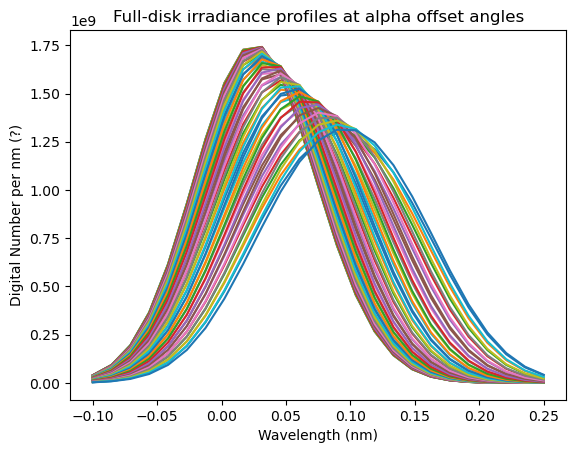

In [39]:
# Profiles during cruciformscan
fig, ax = plt.subplots()
# Profiles during cruciformscan in alpha direction
for i in range(angle_point_num_alpha):
    ax.plot(wavelength_list, DN['DN_alpha'][i], label='linear')
# ax.set_title("He II 谱线轮廓随入射偏角𝜶变化的模拟结果")
ax.set_title("Full-disk irradiance profiles at alpha offset angles")
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("Digital Number per nm (?)")

Text(0.5, 1.0, 'Unpanned simulation')

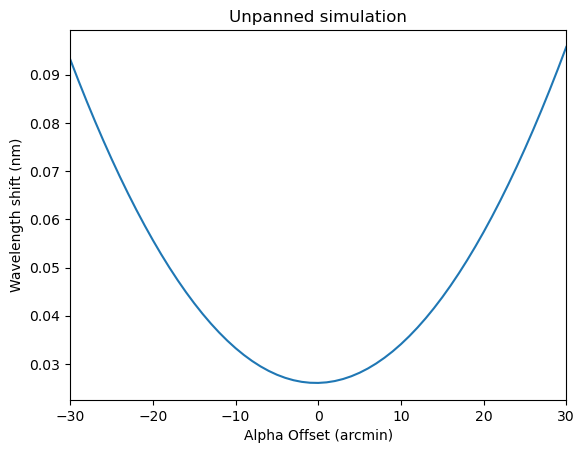

In [41]:
# Central wavelength shift
fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha)
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlim(-30,30)
ax.set_title("Unpanned simulation")

(-30.0, 30.0)

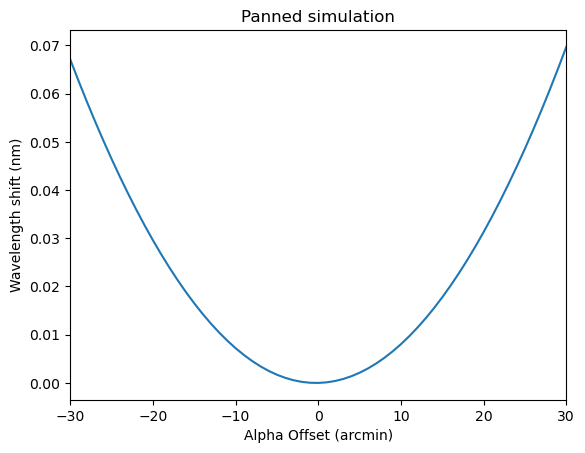

In [42]:
# Panned central wavelength shift
# Y 轴的零点被设定为全日面 He II 谱线在没有任何 SDO 卫星偏转时的中心波长位置，
# 也就是𝛼 = 0且𝛽 = 0的情况
# 我采用直接向下平移

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha -
        wavelength_shift_alpha[int(angle_point_num_alpha/2)]) # 我采用直接向下平移
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

## 论文中的结果  对比

(-30.0, 30.0)

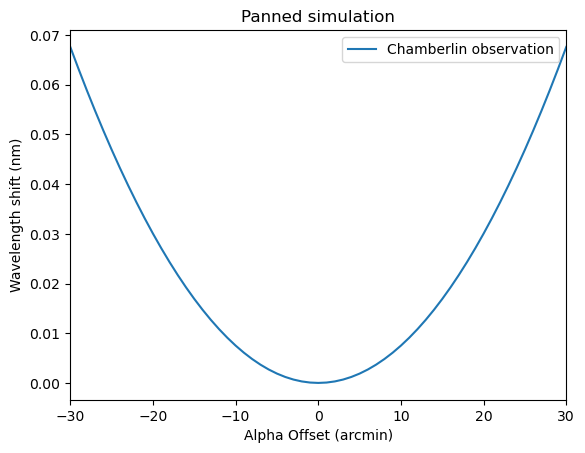

In [56]:
# central wavelength shift 
# my panned simulation vs. Chamberlin(2016) observation

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha,19.2*transunit*offaxis_angle_x_alpha**2)  #这个换算详见unit_conversion.py
ax.legend(["Chamberlin observation"])
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

In [58]:
19.2*transunit*offaxis_angle_x_alpha**2

array([6.76087319e-02, 6.31766039e-02, 5.88947175e-02, 5.47630728e-02,
       5.07816697e-02, 4.69505082e-02, 4.32695884e-02, 3.97389102e-02,
       3.63584736e-02, 3.31282786e-02, 3.00483253e-02, 2.71186136e-02,
       2.43391435e-02, 2.17099150e-02, 1.92309282e-02, 1.69021830e-02,
       1.47236794e-02, 1.26954174e-02, 1.08173971e-02, 9.08961839e-03,
       7.51208132e-03, 6.08478587e-03, 4.80773204e-03, 3.68091985e-03,
       2.70434927e-03, 1.87802033e-03, 1.20193301e-03, 6.76087319e-04,
       3.00483253e-04, 7.51208132e-05, 0.00000000e+00, 7.51208132e-05,
       3.00483253e-04, 6.76087319e-04, 1.20193301e-03, 1.87802033e-03,
       2.70434927e-03, 3.68091985e-03, 4.80773204e-03, 6.08478587e-03,
       7.51208132e-03, 9.08961839e-03, 1.08173971e-02, 1.26954174e-02,
       1.47236794e-02, 1.69021830e-02, 1.92309282e-02, 2.17099150e-02,
       2.43391435e-02, 2.71186136e-02, 3.00483253e-02, 3.31282786e-02,
       3.63584736e-02, 3.97389102e-02, 4.32695884e-02, 4.69505082e-02,
      

(-30.0, 30.0)

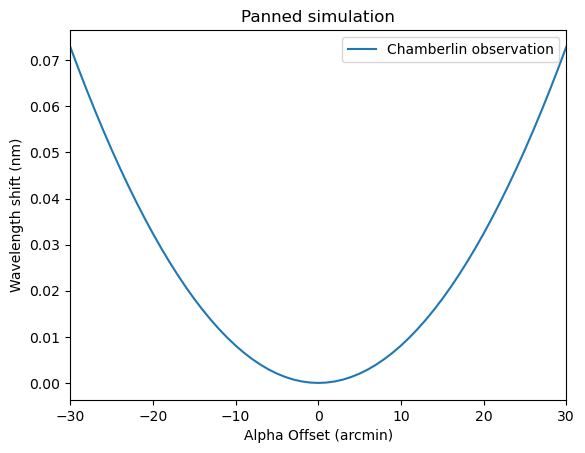

In [65]:
# central wavelength shift 
# my panned simulation vs. Chamberlin(2016) observation

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha,20.7*transunit*offaxis_angle_x_alpha**2)  #这个换算详见unit_conversion.py
ax.legend(["Chamberlin observation"])
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

In [66]:
20.7*transunit*offaxis_angle_x_alpha**2

array([7.28906640e-02, 6.81122761e-02, 6.34958673e-02, 5.90414379e-02,
       5.47489877e-02, 5.06185167e-02, 4.66500250e-02, 4.28435125e-02,
       3.91989793e-02, 3.57164254e-02, 3.23958507e-02, 2.92372552e-02,
       2.62406391e-02, 2.34060021e-02, 2.07333444e-02, 1.82226660e-02,
       1.58739668e-02, 1.36872469e-02, 1.16625062e-02, 9.79974483e-03,
       8.09896267e-03, 6.56015976e-03, 5.18333611e-03, 3.96849171e-03,
       2.91562656e-03, 2.02474067e-03, 1.29583403e-03, 7.28906640e-04,
       3.23958507e-04, 8.09896267e-05, 0.00000000e+00, 8.09896267e-05,
       3.23958507e-04, 7.28906640e-04, 1.29583403e-03, 2.02474067e-03,
       2.91562656e-03, 3.96849171e-03, 5.18333611e-03, 6.56015976e-03,
       8.09896267e-03, 9.79974483e-03, 1.16625062e-02, 1.36872469e-02,
       1.58739668e-02, 1.82226660e-02, 2.07333444e-02, 2.34060021e-02,
       2.62406391e-02, 2.92372552e-02, 3.23958507e-02, 3.57164254e-02,
       3.91989793e-02, 4.28435125e-02, 4.66500250e-02, 5.06185167e-02,
      

我的结果上图与下图博士论文P46结果明显不同：

上图：我的蓝线模拟在橙线下方

下图：红色模拟在观测黑虚线上方

P46 图 3.6 He II 中心波长随入射偏角𝜶和𝜷变化的模拟结果和观测结果

<img src="./visualization.assets/image-20230311153746936.png" alt="image-20230311153746936" style="zoom:70%;" />



论文P50对于“为什么A越迭代越大”的解释:

<img src="./visualization.assets/image-20230311155201746.png" alt="image-20230311155201746" style="zoom:33%;" />

而对于论文P50，对于“为什么A越迭代越大”的解释，我有不同的想法：

1. $\Delta \lambda_0 < \bar{\Delta \lambda}$ 的分析正确

2. 所以未向下平移的蓝线在橙色线上方

    <img src="./visualization.assets/image-20230312154237323.png" alt="image-20230312154237323" style="zoom:50%;" />

3. 但是我不理解为什么上述理论说明将蓝色线向下平移后（P46上半页是指的是平移吧？）蓝色线仍应该在橙线上方。

   而我的结果就在下方了。。

    <img src="./visualization.assets/image-20230312154314802.png" alt="image-20230312154314802" style="zoom:50%;" />

6561